In [1]:
import pandas as pd, numpy as np, os
from get_draws.api import get_draws
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir = '/mnt/share/costeffectiveness/results/vivarium_ciff_sam/v7.0.0_full_model_no_x_factor/ciff_sam/2022_03_04_17_34_48/count_data/'

In [3]:
figname = 'model_7.0.0'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# maternal bmi

In [5]:
births = pd.read_csv(output_dir +'births.csv')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
2112,2112,female,2022,total_births,29,baseline,0.0,covered,bep,cat2
2113,2113,female,2022,total_births,29,baseline,0.0,uncovered,bep,cat2
2114,2114,female,2022,total_births,29,baseline,0.0,covered,mmn,cat2
2115,2115,female,2022,total_births,29,baseline,0.0,uncovered,mmn,cat2
2116,2116,female,2022,total_births,29,baseline,1338.0,covered,ifa,cat2


## check exposure

proportion of babies born to each maternal BMI category
- validation target is 0.224 (95% CI: 0.217, 0.231) for cat1

In [6]:
cols = ['input_draw','scenario','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

count      mean      std  \
scenario             maternal_malnutrition                             
baseline             cat1                    11.0  0.224487  0.00436   
                     cat2                    11.0  0.775513  0.00436   
lbwsg_interventions  cat1                    11.0  0.224487  0.00436   
                     cat2                    11.0  0.775513  0.00436   
mam_treatment        cat1                    11.0  0.224487  0.00436   
                     cat2                    11.0  0.775513  0.00436   
sam_treatment        cat1                    11.0  0.224487  0.00436   
                     cat2                    11.0  0.775513  0.00436   
sqlns                cat1                    11.0  0.224487  0.00436   
                     cat2                    11.0  0.775513  0.00436   
zinc_supplementation cat1                    11.0  0.224487  0.00436   
                     cat2                    11.0  0.775513  0.00436   

                                                 min      2.5%       50%  \
scenario             maternal_malnutrition                                 
baseline             cat1                   0.219221  0.219320  0.224013   
                     cat2                   0.768519  0.768843  0.775987   
lbwsg_interventions  cat1                   0.219221  0.219320  0.224013   
                     cat2                   0.768519  0.768843  0.775987   
mam_treatment        cat1                   0.219221  0.219320  0.224013   
                     cat2                   0.768519  0.768843  0.775987   
sam_treatment        cat1                   0.219221  0.219320  0.224013   
                     cat2                   0.768519  0.768843  0.775987   
sqlns                cat1                   0.219221  0.219320  0.224013   
                     cat2                   0.768519  0.768843  0.775987   
zinc_supplementation cat1                   0.219221  0.219320  0.224013   
                     cat2                   0.768519  0.768843  0.775987   

                                               97.5%       max  
scenario             maternal_malnutrition                      
baseline             cat1                   0.231157  0.231481  
                     cat2                   0.780680  0.780779  
lbwsg_interventions  cat1                   0.231157  0.231481  
                     cat2                   0.780680  0.780779  
mam_treatment        cat1                   0.231157  0.231481  
                     cat2                   0.780680  0.780779  
sam_treatment        cat1                   0.231157  0.231481  
                     cat2                   0.780680  0.780779  
sqlns                cat1                   0.231157  0.231481  
                     cat2                   0.780680  0.780779  
zinc_supplementation cat1                   0.231157  0.231481  
                     cat2                   0.780680  0.780779

In [7]:
# check it does not vary by sex
cols = ['input_draw','scenario','sex','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

# looks good

count      mean       std  \
scenario             sex    maternal_malnutrition                              
baseline             female cat1                    11.0  0.224591  0.004016   
                            cat2                    11.0  0.775409  0.004016   
                     male   cat1                    11.0  0.224392  0.004874   
                            cat2                    11.0  0.775608  0.004874   
lbwsg_interventions  female cat1                    11.0  0.224591  0.004016   
                            cat2                    11.0  0.775409  0.004016   
                     male   cat1                    11.0  0.224392  0.004874   
                            cat2                    11.0  0.775608  0.004874   
mam_treatment        female cat1                    11.0  0.224591  0.004016   
                            cat2                    11.0  0.775409  0.004016   
                     male   cat1                    11.0  0.224392  0.004874   
                            cat2                    11.0  0.775608  0.004874   
sam_treatment        female cat1                    11.0  0.224591  0.004016   
                            cat2                    11.0  0.775409  0.004016   
                     male   cat1                    11.0  0.224392  0.004874   
                            cat2                    11.0  0.775608  0.004874   
sqlns                female cat1                    11.0  0.224591  0.004016   
                            cat2                    11.0  0.775409  0.004016   
                     male   cat1                    11.0  0.224392  0.004874   
                            cat2                    11.0  0.775608  0.004874   
zinc_supplementation female cat1                    11.0  0.224591  0.004016   
                            cat2                    11.0  0.775409  0.004016   
                     male   cat1                    11.0  0.224392  0.004874   
                            cat2                    11.0  0.775608  0.004874   

                                                        min      2.5%  \
scenario             sex    maternal_malnutrition                       
baseline             female cat1                   0.218515  0.218643   
                            cat2                   0.770166  0.770187   
                     male   cat1                   0.218841  0.219103   
                            cat2                   0.766955  0.767567   
lbwsg_interventions  female cat1                   0.218515  0.218643   
                            cat2                   0.770166  0.770187   
                     male   cat1                   0.218841  0.219103   
                            cat2                   0.766955  0.767567   
mam_treatment        female cat1                   0.218515  0.218643   
                            cat2                   0.770166  0.770187   
                     male   cat1                   0.218841  0.219103   
                            cat2                   0.766955  0.767567   
sam_treatment        female cat1                   0.218515  0.218643   
                            cat2                   0.770166  0.770187   
                     male   cat1                   0.218841  0.219103   
                            cat2                   0.766955  0.767567   
sqlns                female cat1                   0.218515  0.218643   
                            cat2                   0.770166  0.770187   
                     male   cat1                   0.218841  0.219103   
                            cat2                   0.766955  0.767567   
zinc_supplementation female cat1                   0.218515  0.218643   
                            cat2                   0.770166  0.770187   
                     male   cat1                   0.218841  0.219103   
                            cat2                   0.766955  0.767567   

                                                       50%     97.5%   

In [8]:
# check it does not vary by year
cols = ['input_draw','scenario','year','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value'].head(12)

# looks good

count      mean       std  \
scenario            year maternal_malnutrition                              
baseline            2022 cat1                    11.0  0.223267  0.007380   
                         cat2                    11.0  0.776733  0.007380   
                    2023 cat1                    11.0  0.223712  0.004116   
                         cat2                    11.0  0.776288  0.004116   
                    2024 cat1                    11.0  0.224732  0.004352   
                         cat2                    11.0  0.775268  0.004352   
                    2025 cat1                    11.0  0.224942  0.004743   
                         cat2                    11.0  0.775058  0.004743   
                    2026 cat1                    11.0  0.225789  0.005085   
                         cat2                    11.0  0.774211  0.005085   
lbwsg_interventions 2022 cat1                    11.0  0.223267  0.007380   
                         cat2                    11.0  0.776733  0.007380   

                                                     min      2.5%       50%  \
scenario            year maternal_malnutrition                                 
baseline            2022 cat1                   0.214559  0.214746  0.221836   
                         cat2                   0.765235  0.765532  0.778164   
                    2023 cat1                   0.219016  0.219027  0.222125   
                         cat2                   0.769748  0.770131  0.777875   
                    2024 cat1                   0.216975  0.217577  0.224127   
                         cat2                   0.769547  0.769630  0.775873   
                    2025 cat1                   0.219542  0.219704  0.223961   
                         cat2                   0.764576  0.765998  0.776039   
                    2026 cat1                   0.218948  0.219110  0.224033   
                         cat2                   0.765051  0.765760  0.775967   
lbwsg_interventions 2022 cat1                   0.214559  0.214746  0.221836   
                         cat2                   0.765235  0.765532  0.778164   

                                                   97.5%       max  
scenario            year maternal_malnutrition                      
baseline            2022 cat1                   0.234468  0.234765  
                         cat2                   0.785254  0.785441  
                    2023 cat1                   0.229869  0.230252  
                         cat2                   0.780973  0.780984  
                    2024 cat1                   0.230370  0.230453  
                         cat2                   0.782423  0.783025  
                    2025 cat1                   0.234002  0.235424  
                         cat2                   0.780296  0.780458  
                    2026 cat1                   0.234240  0.234949  
                         cat2                   0.780890  0.781052  
lbwsg_interventions 2022 cat1                   0.234468  0.234765  
                         cat2                   0.785254  0.785441

## Birthweight difference by maternal bmi strata

validation target is -138.46 (95% CI: -174.68, -102.25) for cat1 relative to cat2

In [9]:
((bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count         mean        std  \
scenario             maternal_malnutrition                                  
baseline             cat1                    11.0  3097.756189  31.417700   
                     cat2                    11.0  3231.809185  21.163425   
lbwsg_interventions  cat1                    11.0  3162.939624  36.417113   
                     cat2                    11.0  3262.831458  21.824711   
mam_treatment        cat1                    11.0  3097.756189  31.417700   
                     cat2                    11.0  3231.809185  21.163425   
sam_treatment        cat1                    11.0  3097.756189  31.417700   
                     cat2                    11.0  3231.809185  21.163425   
sqlns                cat1                    11.0  3097.756189  31.417700   
                     cat2                    11.0  3231.809185  21.163425   
zinc_supplementation cat1                    11.0  3162.939624  36.417113   
                     cat2                    11.0  3262.831458  21.824711   

                                                    min         2.5%  \
scenario             maternal_malnutrition                             
baseline             cat1                   3049.759298  3050.686272   
                     cat2                   3193.051608  3198.970407   
lbwsg_interventions  cat1                   3089.905847  3101.380963   
                     cat2                   3223.260798  3229.575795   
mam_treatment        cat1                   3049.759298  3050.686272   
                     cat2                   3193.051608  3198.970407   
sam_treatment        cat1                   3049.759298  3050.686272   
                     cat2                   3193.051608  3198.970407   
sqlns                cat1                   3049.759298  3050.686272   
                     cat2                   3193.051608  3198.970407   
zinc_supplementation cat1                   3089.905847  3101.380963   
                     cat2                   3223.260798  3229.575795   

                                                    50%        97.5%  \
scenario             maternal_malnutrition                             
baseline             cat1                   3103.639715  3150.464550   
                     cat2                   3231.351467  3269.461906   
lbwsg_interventions  cat1                   3155.182308  3211.154713   
                     cat2                   3257.143045  3299.975194   
mam_treatment        cat1                   3103.639715  3150.464550   
                     cat2                   3231.351467  3269.461906   
sam_treatment        cat1                   3103.639715  3150.464550   
                     cat2                   3231.351467  3269.461906   
sqlns                cat1                   3103.639715  3150.464550   
                     cat2                   3231.351467  3269.461906   
zinc_supplementation cat1                   3155.182308  3211.154713   
                     cat2                   3257.143045  3299.975194   

                                                    max  
scenario             maternal_malnutrition               
baseline             cat1                   3157.251516  
                     cat2                   3274.929198  
lbwsg_interventions  cat1                   3216.240896  
                     cat2                   3303.833960  
mam_treatment        cat1                   3157.251516  
                     cat2                   3274.929198  
sam_treatment        cat1                   3157.251516  
                     cat2                   3274.929198  
sqlns                cat1                   3157.251516  
                     cat2                   3274.929198  
zinc_supplementation cat1                   3216.240896  
                     cat2                   3303.833960

In [10]:
data = (bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
diff = diff.groupby(['scenario']).describe(percentiles=[0.025,0.975])
diff
# looks good, except for lbwsg scenario, which should be explained by BEP coverage

value                                                 \
                     count        mean        std         min        2.5%   
scenario                                                                    
baseline              11.0 -134.052996  18.707249 -167.402291 -163.081145   
lbwsg_interventions   11.0  -99.891835  27.127803 -159.364497 -149.790751   
mam_treatment         11.0 -134.052996  18.707249 -167.402291 -163.081145   
sam_treatment         11.0 -134.052996  18.707249 -167.402291 -163.081145   
sqlns                 11.0 -134.052996  18.707249 -167.402291 -163.081145   
zinc_supplementation  11.0  -99.891835  27.127803 -159.364497 -149.790751   

                                                          
                             50%       97.5%         max  
scenario                                                  
baseline             -136.860001 -106.808198 -105.998359  
lbwsg_interventions   -95.927918  -67.941028  -67.365588  
mam_treatment        -136.860001 -106.808198 -105.998359  
sam_treatment        -136.860001 -106.808198 -105.998359  
sqlns                -136.860001 -106.808198 -105.998359  
zinc_supplementation  -95.927918  -67.941028  -67.365588

In [11]:
# confirm this is the case...
data = (bw_sum.groupby(['input_draw','scenario','maternal_malnutrition','maternal_supplementation']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition','maternal_supplementation']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario','maternal_supplementation']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario','maternal_supplementation']))
diff = diff.groupby(['scenario','maternal_supplementation']).describe(percentiles=[0.025,0.975])
diff.dropna()
# looks good!

value                         \
                                              count        mean        std   
scenario             maternal_supplementation                                
baseline             ifa                       11.0 -132.488449  21.182091   
                     uncovered                 11.0 -136.102795  17.678470   
lbwsg_interventions  ifa                       11.0 -130.101727  22.992842   
                     uncovered                 11.0 -134.514921  20.350955   
mam_treatment        ifa                       11.0 -132.488449  21.182091   
                     uncovered                 11.0 -136.102795  17.678470   
sam_treatment        ifa                       11.0 -132.488449  21.182091   
                     uncovered                 11.0 -136.102795  17.678470   
sqlns                ifa                       11.0 -132.488449  21.182091   
                     uncovered                 11.0 -136.102795  17.678470   
zinc_supplementation ifa                       11.0 -130.101727  22.992842   
                     uncovered                 11.0 -134.514921  20.350955   

                                                                       \
                                                      min        2.5%   
scenario             maternal_supplementation                           
baseline             ifa                      -171.080334 -166.411591   
                     uncovered                -162.034575 -161.023415   
lbwsg_interventions  ifa                      -174.996940 -169.317699   
                     uncovered                -162.607711 -161.624591   
mam_treatment        ifa                      -171.080334 -166.411591   
                     uncovered                -162.034575 -161.023415   
sam_treatment        ifa                      -171.080334 -166.411591   
                     uncovered                -162.034575 -161.023415   
sqlns                ifa                      -171.080334 -166.411591   
                     uncovered                -162.034575 -161.023415   
zinc_supplementation ifa                      -174.996940 -169.317699   
                     uncovered                -162.607711 -161.624591   

                                                                       \
                                                      50%       97.5%   
scenario             maternal_supplementation                           
baseline             ifa                      -133.848086 -100.557188   
                     uncovered                -135.967879 -115.303255   
lbwsg_interventions  ifa                      -130.328736  -96.491711   
                     uncovered                -141.354101 -107.424840   
mam_treatment        ifa                      -133.848086 -100.557188   
                     uncovered                -135.967879 -115.303255   
sam_treatment        ifa                      -133.848086 -100.557188   
                     uncovered                -135.967879 -115.303255   
sqlns                ifa                      -133.848086 -100.557188   
                     uncovered                -135.967879 -115.303255   
zinc_supplementation ifa                      -130.328736  -96.491711   
                     uncovered                -141.354101 -107.424840   

                                                           
                                                      max  
scenario             maternal_supplementation              
baseline             ifa                       -99.493947  
                     uncovered                -114.774393  
lbwsg_interventions  ifa                       -92.786735  
                     uncovered                -106.746529  
mam_treatment        ifa                       -99.493947  
                     uncovered                -114.774393  
sam_treatment        ifa                       -99.493947  
                     uncovered                -114.774393  
sqlns                if

## Check proportion low birth weight

This does not have a specific verification target, but is good to check and can be compared to other external literature sources for validation

In [12]:
((lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count      mean       std  \
scenario             maternal_malnutrition                              
baseline             cat1                    11.0  0.143692  0.008868   
                     cat2                    11.0  0.097754  0.002884   
lbwsg_interventions  cat1                    11.0  0.123632  0.007949   
                     cat2                    11.0  0.094282  0.002923   
mam_treatment        cat1                    11.0  0.143692  0.008868   
                     cat2                    11.0  0.097754  0.002884   
sam_treatment        cat1                    11.0  0.143692  0.008868   
                     cat2                    11.0  0.097754  0.002884   
sqlns                cat1                    11.0  0.143692  0.008868   
                     cat2                    11.0  0.097754  0.002884   
zinc_supplementation cat1                    11.0  0.123632  0.007949   
                     cat2                    11.0  0.094282  0.002923   

                                                 min      2.5%       50%  \
scenario             maternal_malnutrition                                 
baseline             cat1                   0.126641  0.128275  0.144665   
                     cat2                   0.093710  0.093724  0.098837   
lbwsg_interventions  cat1                   0.112156  0.112759  0.123909   
                     cat2                   0.090654  0.090663  0.094535   
mam_treatment        cat1                   0.126641  0.128275  0.144665   
                     cat2                   0.093710  0.093724  0.098837   
sam_treatment        cat1                   0.126641  0.128275  0.144665   
                     cat2                   0.093710  0.093724  0.098837   
sqlns                cat1                   0.126641  0.128275  0.144665   
                     cat2                   0.093710  0.093724  0.098837   
zinc_supplementation cat1                   0.112156  0.112759  0.123909   
                     cat2                   0.090654  0.090663  0.094535   

                                               97.5%       max  
scenario             maternal_malnutrition                      
baseline             cat1                   0.156181  0.156849  
                     cat2                   0.101583  0.101781  
lbwsg_interventions  cat1                   0.138397  0.141675  
                     cat2                   0.098439  0.098764  
mam_treatment        cat1                   0.156181  0.156849  
                     cat2                   0.101583  0.101781  
sam_treatment        cat1                   0.156181  0.156849  
                     cat2                   0.101583  0.101781  
sqlns                cat1                   0.156181  0.156849  
                     cat2                   0.101583  0.101781  
zinc_supplementation cat1                   0.138397  0.141675  
                     cat2                   0.098439  0.098764

In [13]:
data = (lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
rr = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        / data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
rr = rr.groupby(['scenario']).describe(percentiles=[0.025,0.975])
rr

value                                                    \
                     count      mean       std       min      2.5%       50%   
scenario                                                                       
baseline              11.0  1.469372  0.068219  1.351406  1.362630  1.487486   
lbwsg_interventions   11.0  1.310837  0.063968  1.236716  1.241887  1.290161   
mam_treatment         11.0  1.469372  0.068219  1.351406  1.362630  1.487486   
sam_treatment         11.0  1.469372  0.068219  1.351406  1.362630  1.487486   
sqlns                 11.0  1.469372  0.068219  1.351406  1.362630  1.487486   
zinc_supplementation  11.0  1.310837  0.063968  1.236716  1.241887  1.290161   

                                          
                         97.5%       max  
scenario                                  
baseline              1.562390  1.574061  
lbwsg_interventions   1.440216  1.470003  
mam_treatment         1.562390  1.574061  
sam_treatment         1.562390  1.574061  
sqlns                 1.562390  1.574061  
zinc_supplementation  1.440216  1.470003

In [14]:
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt.cause.unique()

array(['lower_respiratory_infections', 'measles',
       'susceptible_to_lower_respiratory_infections',
       'susceptible_to_measles'], dtype=object)

In [15]:
dd_pt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')

In [16]:
cols = ['input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
dd_pt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
disease_pt = pd.concat([disease_pt,dd_pt])

disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [17]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [18]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [19]:
pd.read_csv(output_dir +'wasting_state_person_time.csv')

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,covered,uncovered,early_neonatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253435,253435,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,6.726899,cat1,uncovered,uncovered,covered,2_to_4
253436,253436,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,468.164271,cat2,uncovered,covered,uncovered,2_to_4
253437,253437,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,6.584531,cat1,uncovered,covered,uncovered,2_to_4
253438,253438,male,2026,susceptible_to_child_wasting,state_person_time,946,zinc_supplementation,200.175222,cat2,uncovered,uncovered,uncovered,2_to_4


In [20]:
state_pt = pd.read_csv(output_dir +f'wasting_state_person_time.csv')
state_pt = state_pt.groupby(['scenario','input_draw','sex','age','cause']).sum()[['value']]
state_pt_tot = state_pt.groupby(['scenario','input_draw','sex','age']).sum()
prev = state_pt / state_pt_tot
prev.groupby(['scenario','sex','age','cause']).describe(percentiles=[0.025,0.975])

value  \
                                                                         count   
scenario             sex    age             cause                                
baseline             female 1-5_months      mild_child_wasting            11.0   
                                            moderate_acute_malnutrition   11.0   
                                            severe_acute_malnutrition     11.0   
                                            susceptible_to_child_wasting  11.0   
                            12_to_23_months mild_child_wasting            11.0   
...                                                                        ...   
zinc_supplementation male   early_neonatal  susceptible_to_child_wasting  11.0   
                            late_neonatal   mild_child_wasting            11.0   
                                            moderate_acute_malnutrition   11.0   
                                            severe_acute_malnutrition     11.0   
                                            susceptible_to_child_wasting  11.0   

                                                                                    \
                                                                              mean   
scenario             sex    age             cause                                    
baseline             female 1-5_months      mild_child_wasting            0.203500   
                                            moderate_acute_malnutrition   0.077931   
                                            severe_acute_malnutrition     0.022122   
                                            susceptible_to_child_wasting  0.696448   
                            12_to_23_months mild_child_wasting            0.206932   
...                                                                            ...   
zinc_supplementation male   early_neonatal  susceptible_to_child_wasting  0.660077   
                            late_neonatal   mild_child_wasting            0.211940   
                                            moderate_acute_malnutrition   0.091862   
                                            severe_acute_malnutrition     0.036156   
                                            susceptible_to_child_wasting  0.660042   

                                                                                    \
                                                                               std   
scenario             sex    age             cause                                    
baseline             female 1-5_months      mild_child_wasting            0.002403   
                                            moderate_acute_malnutrition   0.002670   
                                            severe_acute_malnutrition     0.001559   
                                            susceptible_to_child_wasting  0.004568   
                            12_to_23_months mild_child_wasting            0.002593   
...                                                                            ...   
zinc_supplementation male   early_neonatal  susceptible_to_child_wasting  0.005226   
                            late_neonatal   mild_child_wasting            0.003471   
                                            moderate_acute_malnutrition   0.002717   
                                            severe_acute_malnutrition     0.002725   
                                            susceptible_to_child_wasting  0.005238   

                                                                                    \
                                                                               min   
scenario             sex    age             cause                                    
baseline             female 1-5_months      mild_child_wasting            0.200472   
                                            moderate_acute_malnutrition   0.071683   
                                            severe_acute_malnutrition     0.019377  

In [21]:
state_pt

value
scenario             input_draw sex    age             cause                                     
baseline             29         female 1-5_months      mild_child_wasting             4422.201232
                                                       moderate_acute_malnutrition    1707.467488
                                                       severe_acute_malnutrition       464.858316
                                                       susceptible_to_child_wasting  15464.417522
                                       12_to_23_months mild_child_wasting            10539.723477
...                                                                                           ...
zinc_supplementation 946        male   early_neonatal  susceptible_to_child_wasting    703.633128
                                       late_neonatal   mild_child_wasting              646.083504
                                                       moderate_acute_malnutrition     288.882957
                                                       severe_acute_malnutrition       127.839836
                                                       susceptible_to_child_wasting   2081.216975

[3168 rows x 1 columns]

In [22]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev

value                      \
                                                    count      mean       std   
sex    age             cause                                                    
female 1-5_months      mild_child_wasting            11.0  0.203500  0.002403   
                       moderate_acute_malnutrition   11.0  0.077931  0.002670   
                       severe_acute_malnutrition     11.0  0.022122  0.001559   
                       susceptible_to_child_wasting  11.0  0.696448  0.004568   
                       wasted                        11.0  0.100052  0.004144   
       12_to_23_months mild_child_wasting            11.0  0.206932  0.002593   
                       moderate_acute_malnutrition   11.0  0.074100  0.002750   
                       severe_acute_malnutrition     11.0  0.017609  0.000731   
                       susceptible_to_child_wasting  11.0  0.701358  0.002414   
                       wasted                        11.0  0.091709  0.003295   
       2_to_4          mild_child_wasting            11.0  0.201404  0.003600   
                       moderate_acute_malnutrition   11.0  0.062200  0.003025   
                       severe_acute_malnutrition     11.0  0.010338  0.001084   
                       susceptible_to_child_wasting  11.0  0.726058  0.002185   
                       wasted                        11.0  0.072538  0.003846   
       6-11_months     mild_child_wasting            11.0  0.200944  0.002779   
                       moderate_acute_malnutrition   11.0  0.078198  0.002199   
                       severe_acute_malnutrition     11.0  0.022633  0.001284   
                       susceptible_to_child_wasting  11.0  0.698226  0.003114   
                       wasted                        11.0  0.100830  0.003209   
       early_neonatal  mild_child_wasting            11.0  0.203450  0.002316   
                       moderate_acute_malnutrition   11.0  0.077930  0.002813   
                       severe_acute_malnutrition     11.0  0.022128  0.001680   
                       susceptible_to_child_wasting  11.0  0.696492  0.004354   
                       wasted                        11.0  0.100058  0.004388   
       late_neonatal   mild_child_wasting            11.0  0.203516  0.002391   
                       moderate_acute_malnutrition   11.0  0.077962  0.002747   
                       severe_acute_malnutrition     11.0  0.022105  0.001647   
                       susceptible_to_child_wasting  11.0  0.696417  0.004423   
                       wasted                        11.0  0.100067  0.004302   
male   1-5_months      mild_child_wasting            11.0  0.209455  0.003900   
                       moderate_acute_malnutrition   11.0  0.093577  0.002772   
                       severe_acute_malnutrition     11.0  0.036780  0.002940   
                       susceptible_to_child_wasting  11.0  0.660187  0.005329   
                       wasted                        11.0  0.130357  0.005340   
       12_to_23_months mild_child_wasting            11.0  0.220597  0.004485   
                       moderate_acute_malnutrition   11.0  0.091395  0.003139   
                       severe_acute_malnutrition     11.0  0.028737  0.001488   
                       susceptible_to_child_wasting  11.0  0.659271  0.002897   
                       wasted                        11.0  0.120132  0.004464   
       2_to_4          mild_child_wasting            11.0  0.213079  0.007215   
                       moderate_acute_malnutrition   11.0  0.073394  0.002736   
                       severe_acute_malnutrition     11.0  0.016219  0.001185   
                       susceptible_to_child_wasting  11.0  0.697308  0.006527   
                       wasted                        11.0  0.089614  0.003812   
       6-11_months     mild_child_wasting            11.0  0.210360  0.002799   
                       moderate_acute_malnutrition   11.0  0.094081  0.002515   
  

In [23]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     11.0  0.039212  0.003998  0.031657  0.032649   
                  cat2     11.0  0.104751  0.003695  0.099695  0.100154   
                  cat3     11.0  0.209130  0.008070  0.195695  0.196517   
                  cat4     11.0  0.646907  0.008517  0.632763  0.633839   
                  stunted  11.0  0.143963  0.006569  0.133190  0.134208   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.039048  0.045888  0.046270  
                  cat2     0.103900  0.111071  0.111593  
                  cat3     0.207620  0.220883  0.221626  
                  cat4     0.645921  0.659862  0.660897  
                  stunted  0.144017  0.155124  0.156333

In [24]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [25]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [26]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.023100,0.019989,0.026792,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.080399,0.076361,0.084449,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.200563,0.195923,0.205312,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,0.695938,0.687181,0.704784,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.023190,0.019931,0.027105,late_neonatal,2


In [27]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.0,0.0,0.0,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.0,0.0,0.0,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.0,0.0,0.0,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,1.0,1.0,1.0,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.0,0.0,0.0,late_neonatal,2


In [28]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

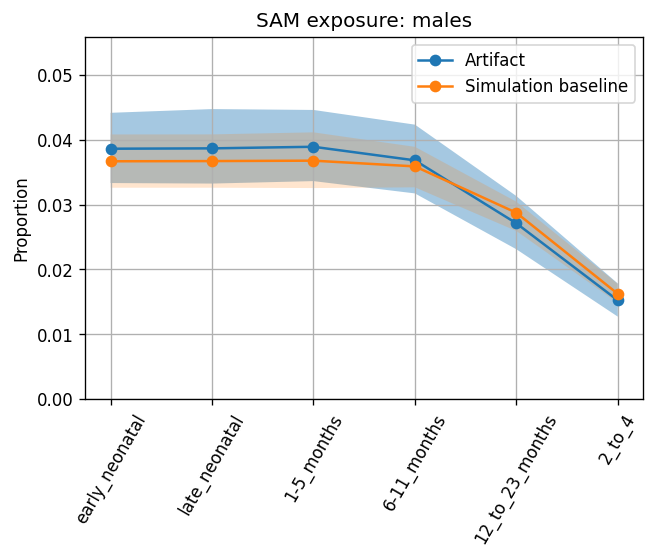

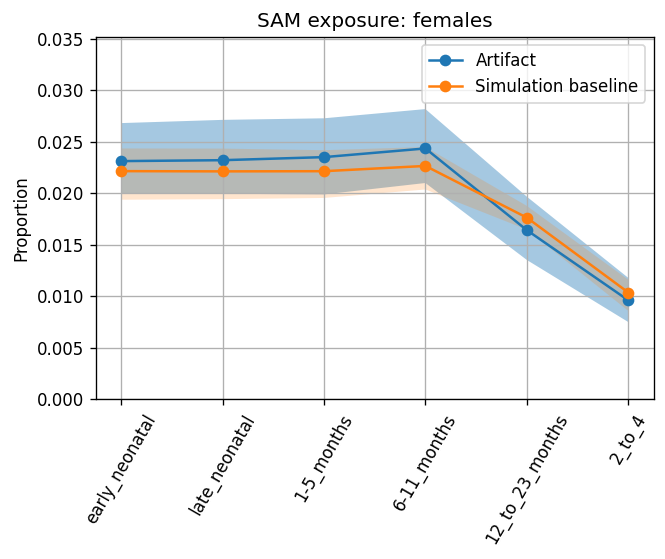

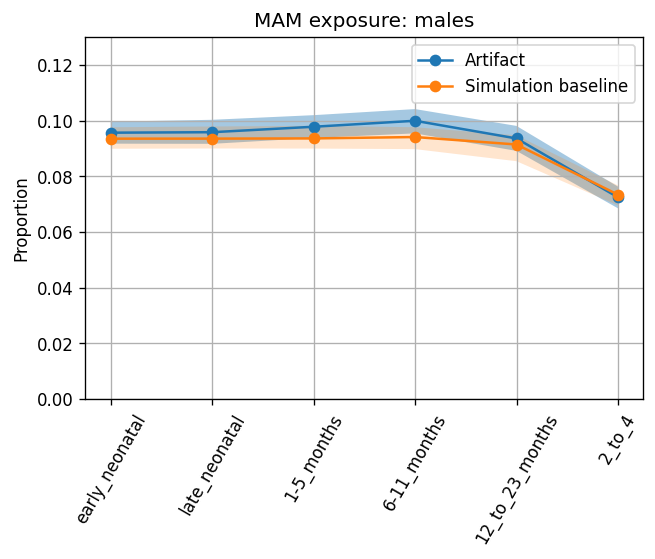

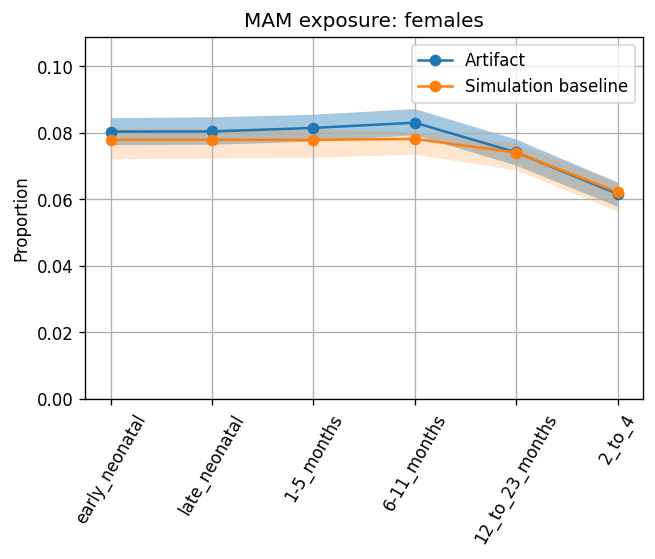

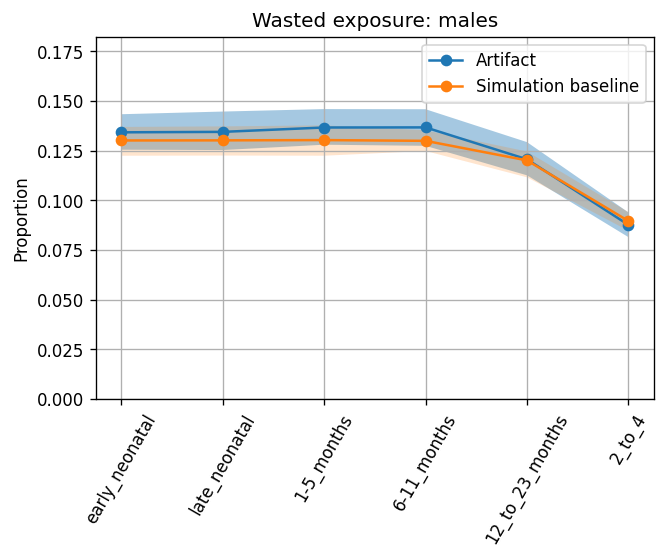

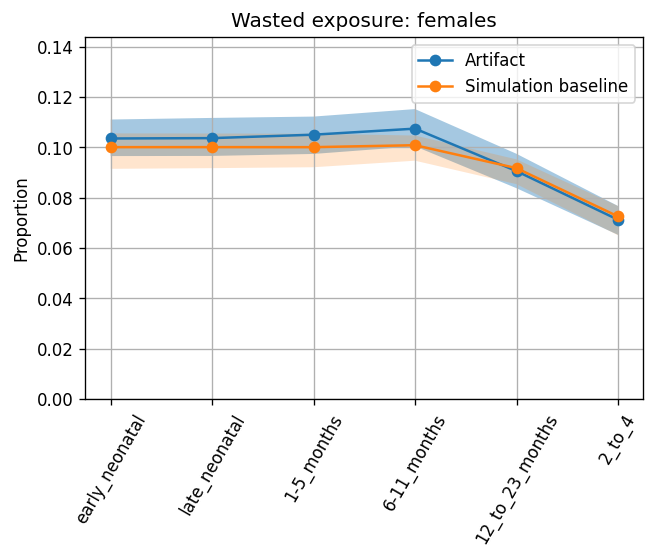

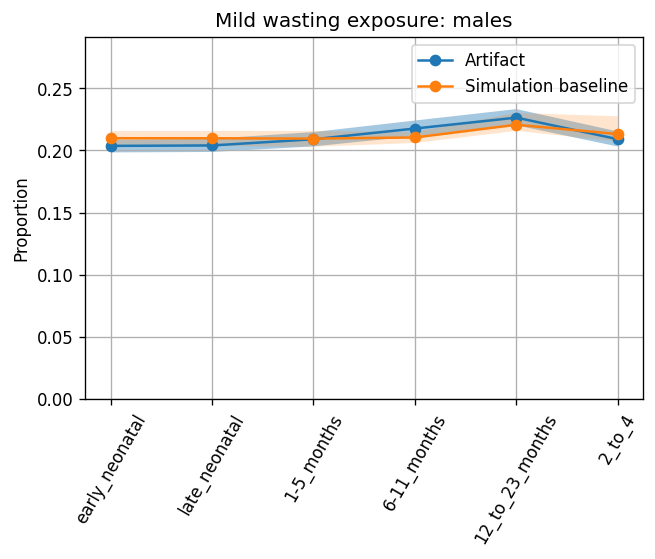

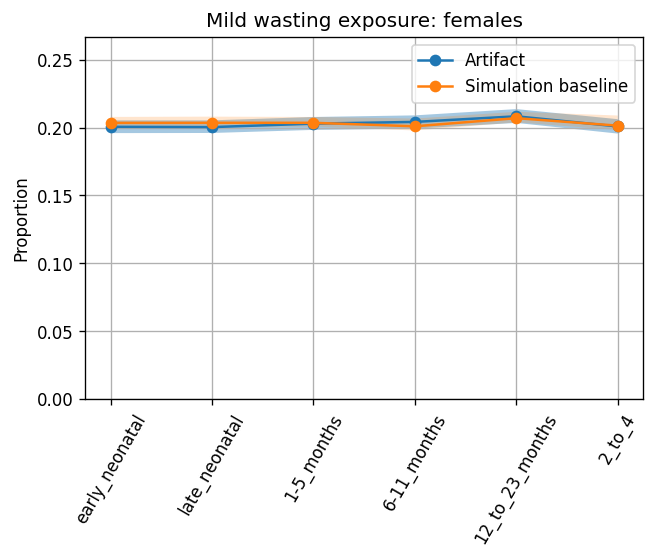

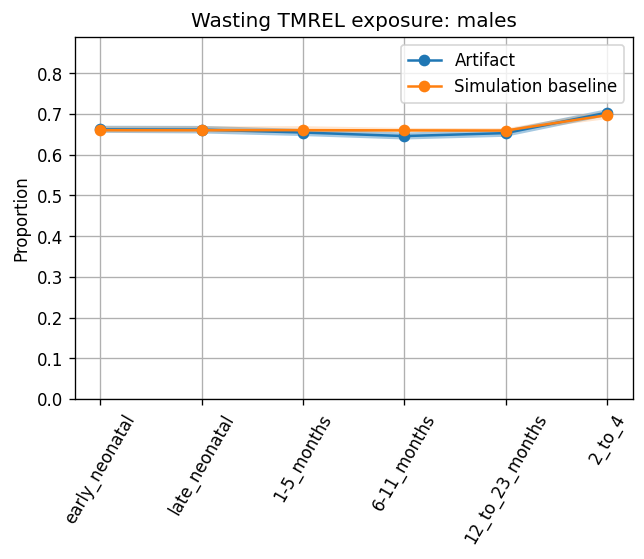

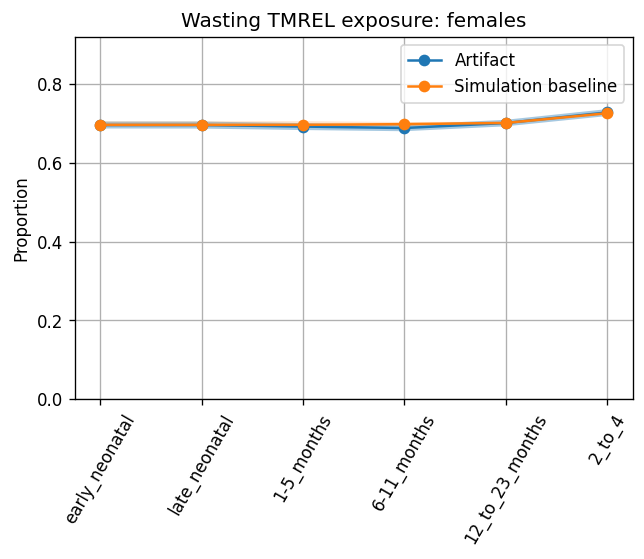

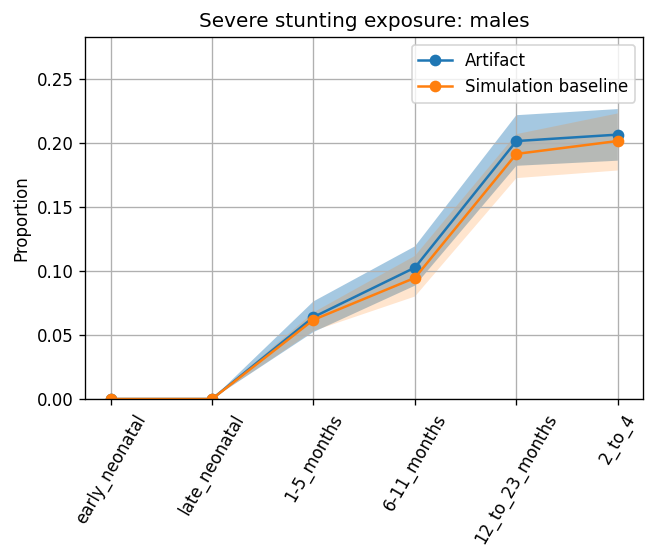

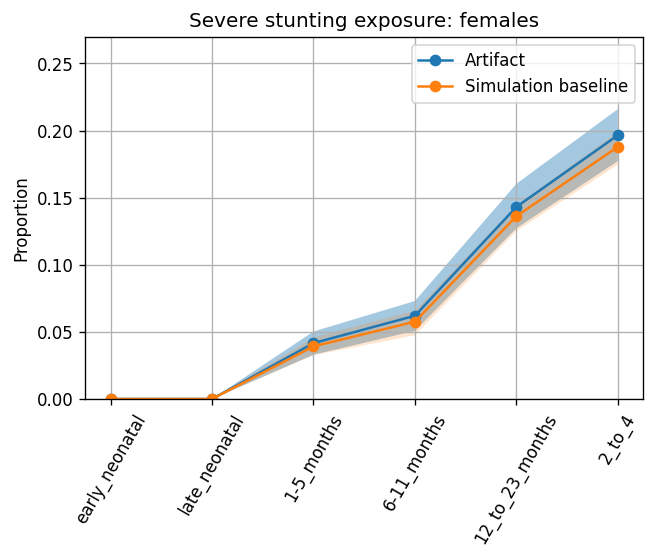

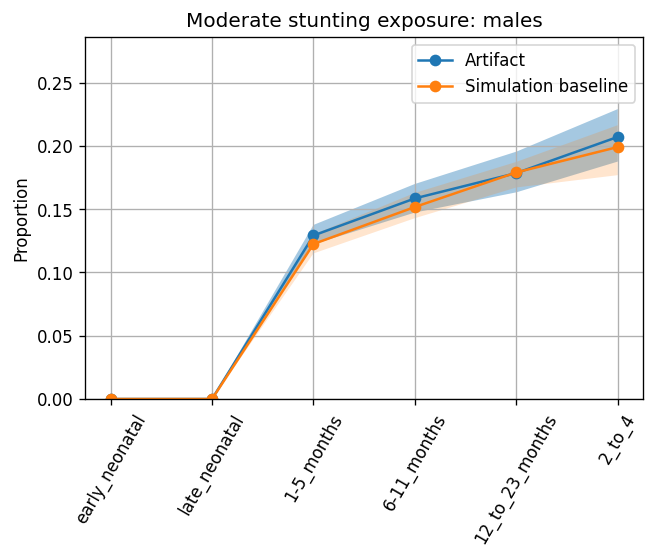

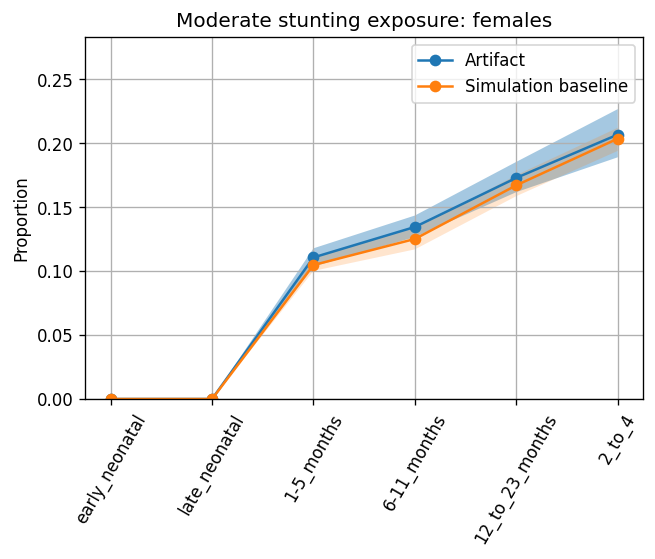

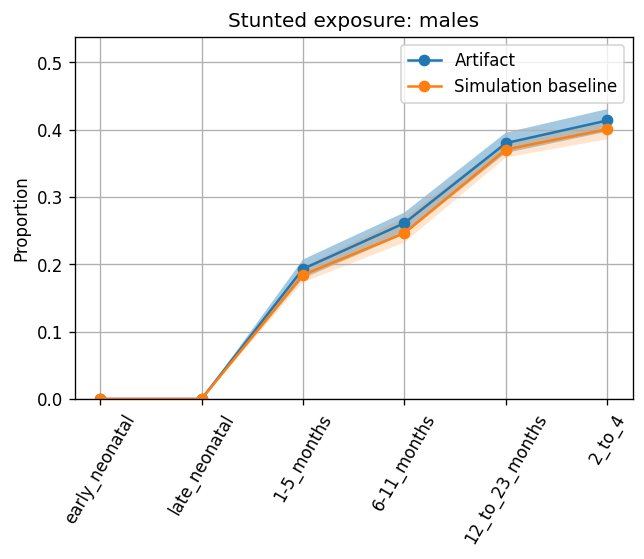

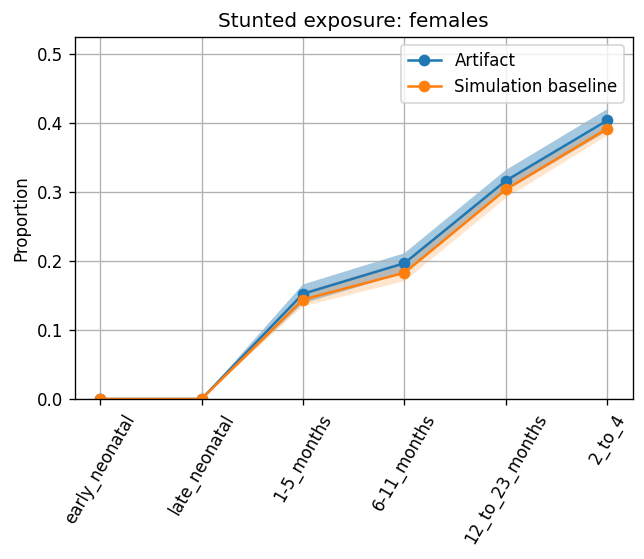

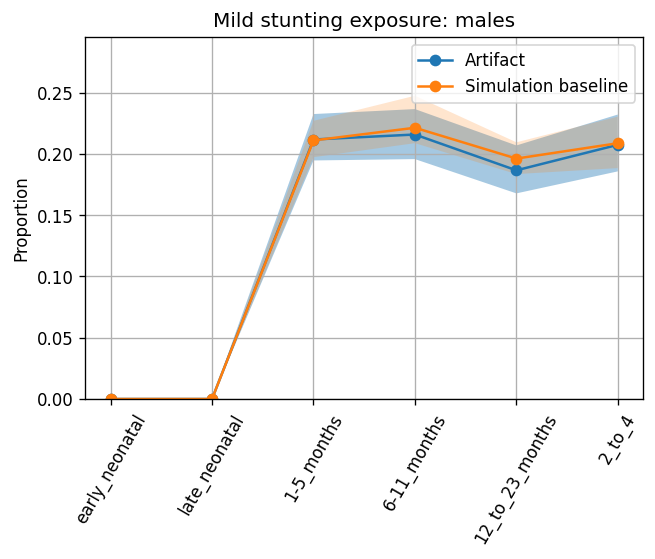

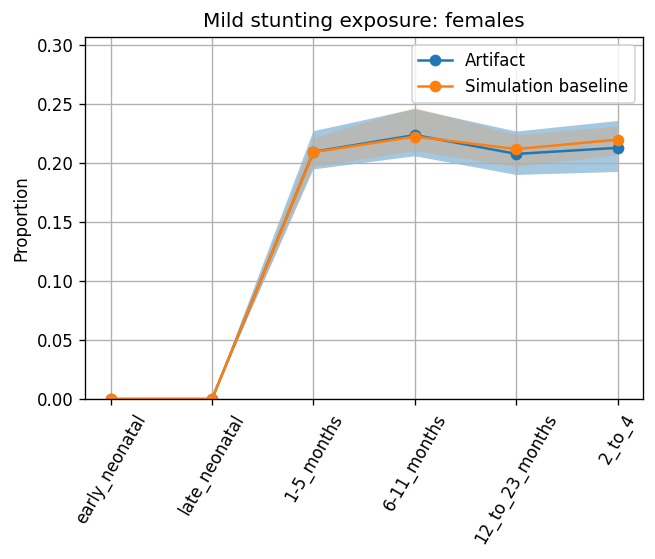

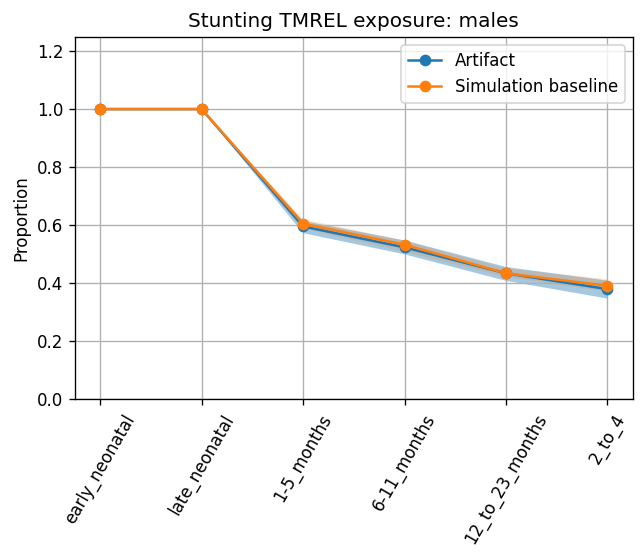

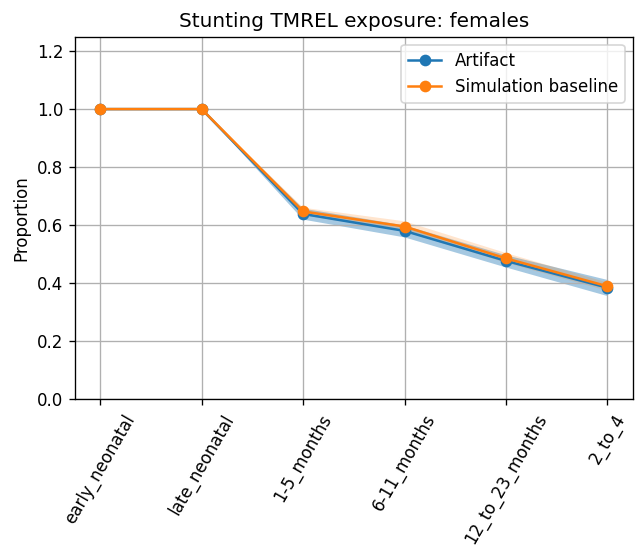

In [29]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
                              art_cats[i], s_sim_cats[i], s_title_cats[i])
            pdf.savefig(bbox_inches='tight')

# Cause parameters

In [30]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [31]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass
artifact_data = artifact_data.sort_values(by='age_group')
artifact_data.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
0,female,0.0,0.019178,2020,2021,0.869707,0.700294,1.093357,early_neonatal,1,cause_specific_mortality_rate,all_causes
42,male,0.0,0.019178,2020,2021,104.357143,104.357143,104.357143,early_neonatal,1,remission_rate,diarrheal_diseases
48,female,0.0,0.019178,2020,2021,0.008350,0.004183,0.016337,early_neonatal,1,cause_specific_mortality_rate,diarrheal_diseases
54,male,0.0,0.019178,2020,2021,0.010762,0.005863,0.018621,early_neonatal,1,cause_specific_mortality_rate,diarrheal_diseases
192,female,0.0,0.019178,2020,2021,0.000000,0.000000,0.000000,early_neonatal,1,excess_mortality_rate,measles


In [32]:
# load GBD cause data
cause_ids = [302,341,322,294]
age_group_ids = [2,3,4,5]
sex_ids = [1,2]
location_id = 179

In [33]:
from db_queries import get_outputs

In [34]:
groupby_cols = ['input_draw','sex','age']

In [35]:
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
dd_pt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
state_pt = pd.concat([disease_pt,dd_pt],ignore_index=True)

transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
dd_trans = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')
transitions = pd.concat([transitions,dd_trans], ignore_index=True)

deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,0,female,2022,diarrheal_diseases,death,29,baseline,1.0,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,death,29,baseline,0.0,mild_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,death,29,baseline,0.0,moderate_acute_malnutrition,early_neonatal
3,3,female,2022,diarrheal_diseases,death,29,baseline,1.0,severe_acute_malnutrition,early_neonatal
4,4,female,2022,diarrheal_diseases,death,29,baseline,3.0,susceptible_to_child_wasting,late_neonatal


In [36]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [37]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [38]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [39]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [40]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

In [41]:
trans

value            \
                                                            count      mean   
sex    age           cause                        measure                     
female 1-5_months    diarrheal_diseases           incidence  11.0  2.763079   
                                                  remission  11.0  2.779384   
                     lower_respiratory_infections incidence  11.0  0.093779   
                                                  remission  11.0  0.090852   
                     measles                      incidence  11.0  0.019224   
...                                                           ...       ...   
male   late_neonatal diarrheal_diseases           remission  11.0  3.156005   
                     lower_respiratory_infections incidence  11.0  0.086213   
                                                  remission  11.0  0.061609   
                     measles                      incidence  11.0  0.000000   
                                                  remission  11.0  0.000000   

                                                                       \
                                                                  std   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  0.295881   
                                                  remission  0.289805   
                     lower_respiratory_infections incidence  0.010869   
                                                  remission  0.010665   
                     measles                      incidence  0.010576   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  0.259519   
                     lower_respiratory_infections incidence  0.012258   
                                                  remission  0.008898   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                  min   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.455490   
                                                  remission  2.486452   
                     lower_respiratory_infections incidence  0.069152   
                                                  remission  0.066041   
                     measles                      incidence  0.007701   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.614219   
                     lower_respiratory_infections incidence  0.067303   
                                                  remission  0.046667   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                 2.5%   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.465214   
                                                  remission  2.495711   
                     lower_respiratory_infections incidence  0.073479   
                                                  remission  0.070945   
                     measles                      incidence  0.007748   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.686627   
                     lower_respiratory_infections incidence  0.068705   
                                                  remission  0.047728   
                     measles   

In [42]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    #g = gbd_data.loc[(gbd_data.sex==sex)
    #                &(gbd_data.cause==cause)
    #                &(gbd_data.measure==measure)]
    #plt.plot(g['age'], g['val'], marker='o', label='GBD data')
    #plt.fill_between(g['age'], g['lower'], g['upper'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

<ipython-input-42-b44566a201c4>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=120)


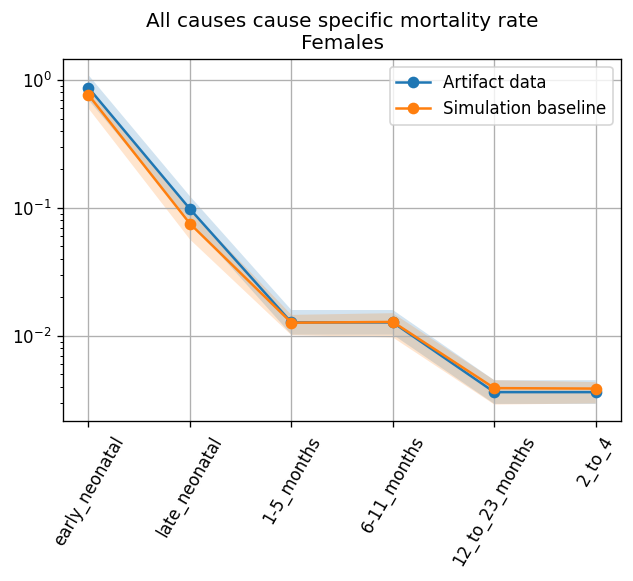

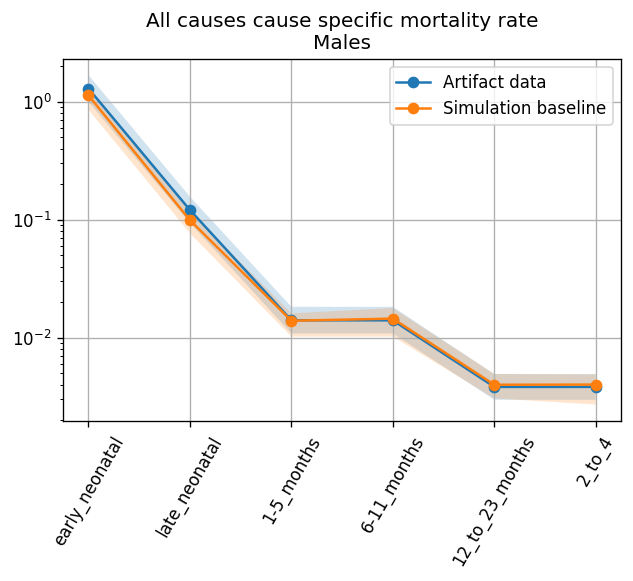

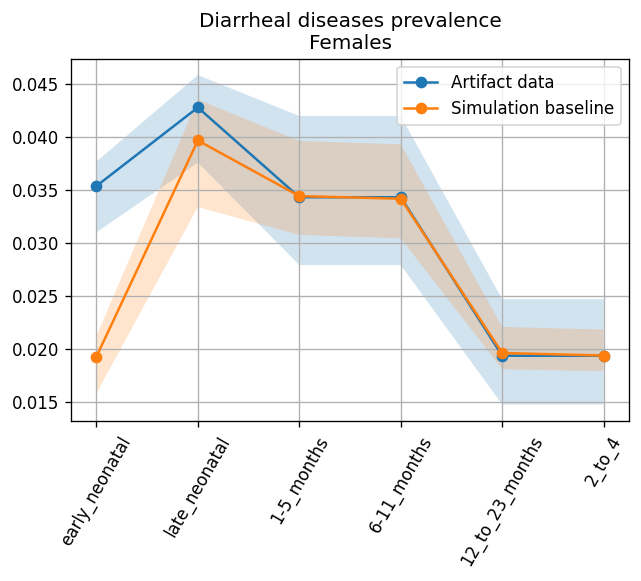

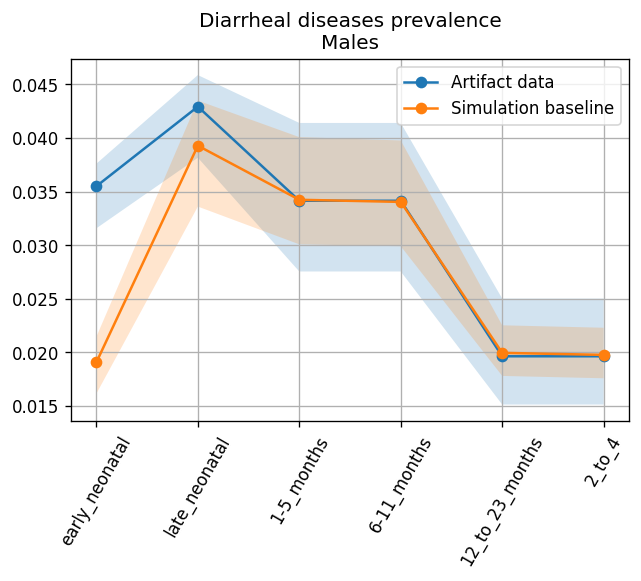

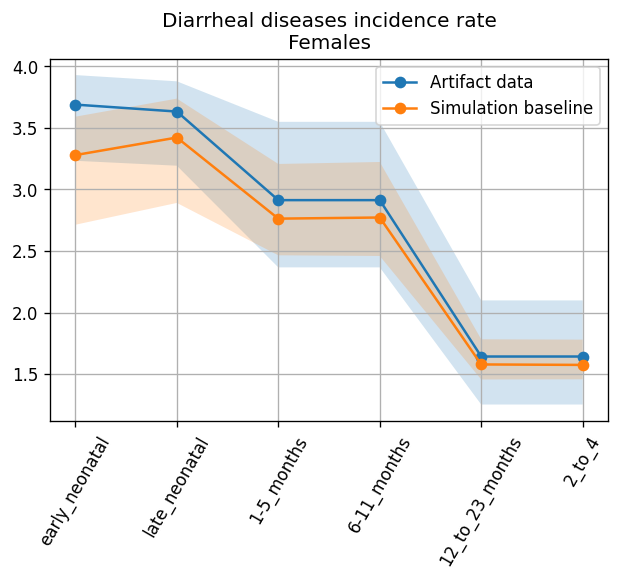

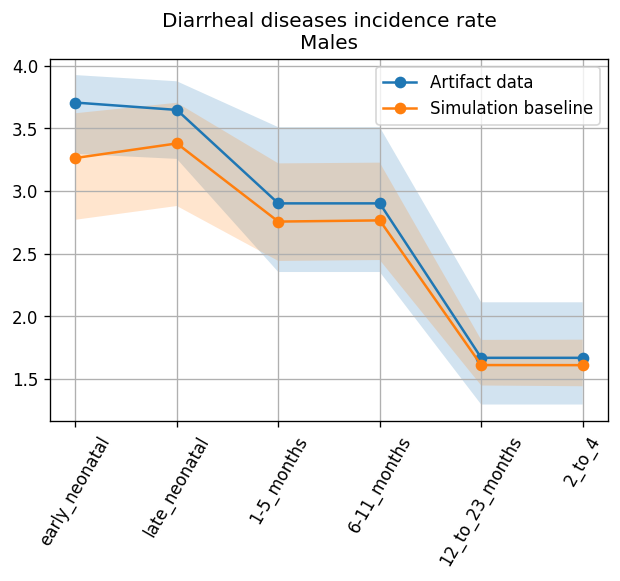

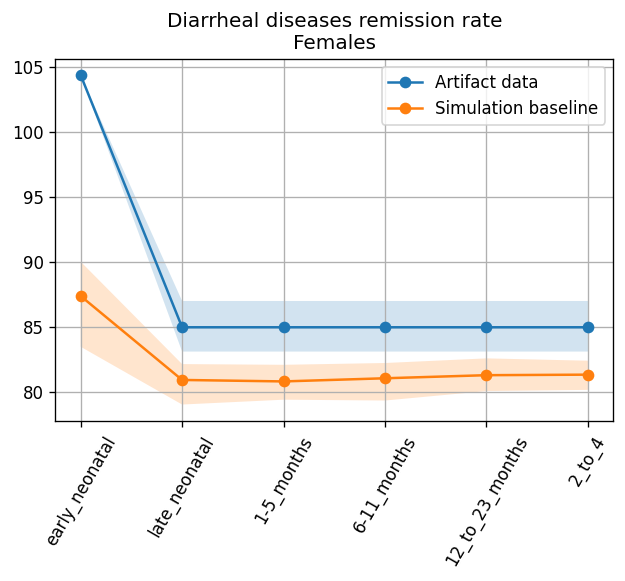

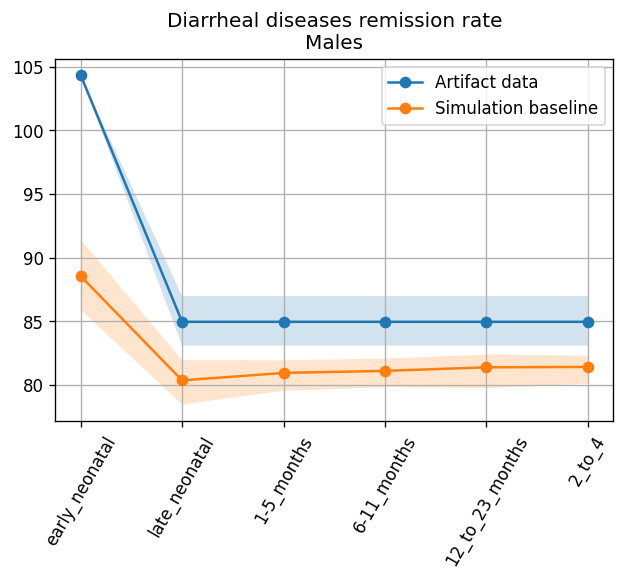

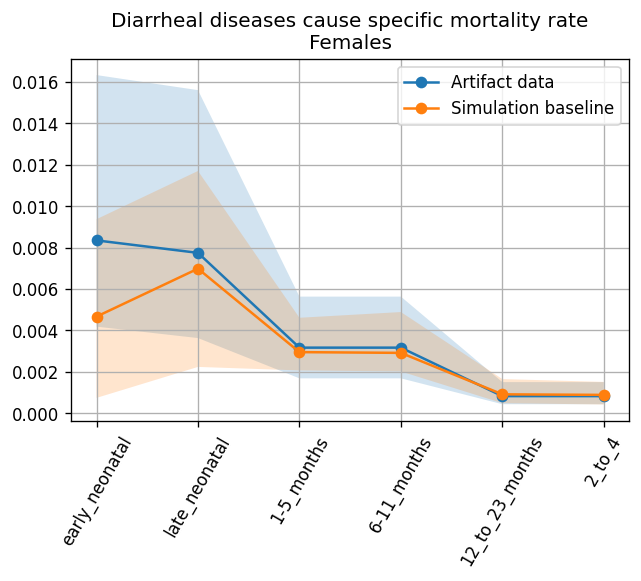

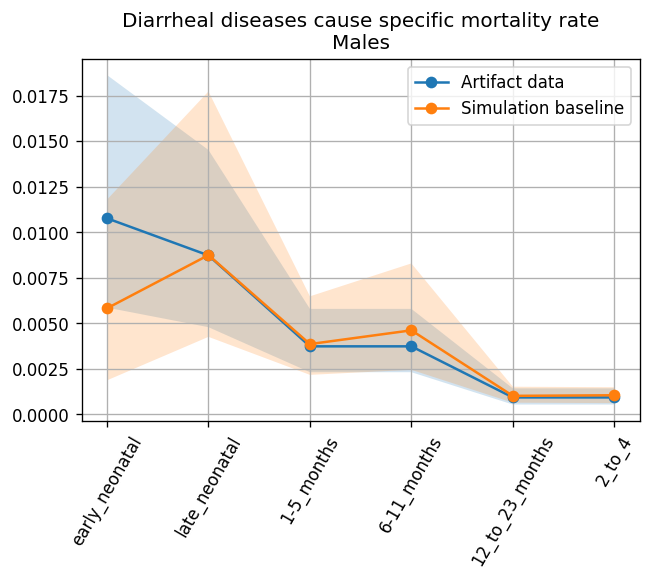

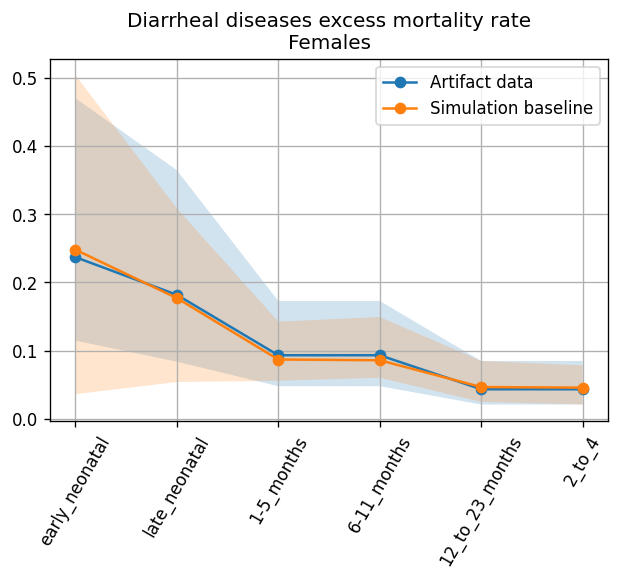

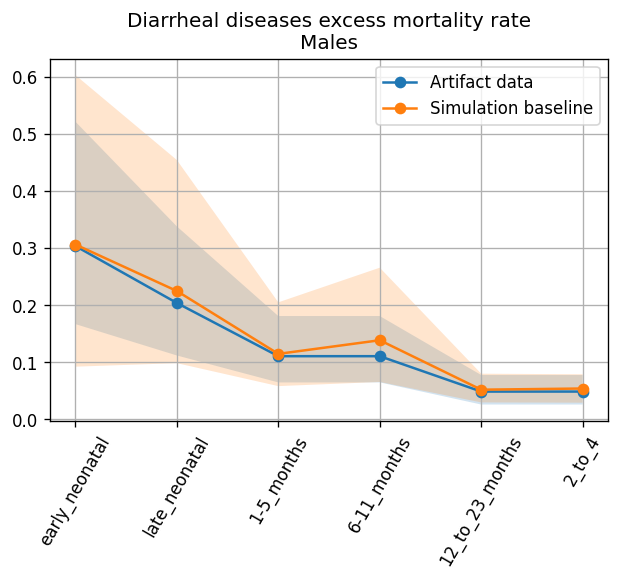

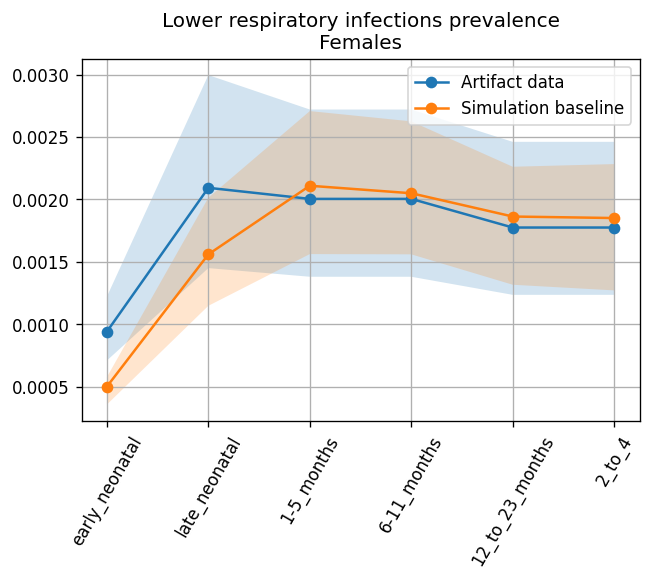

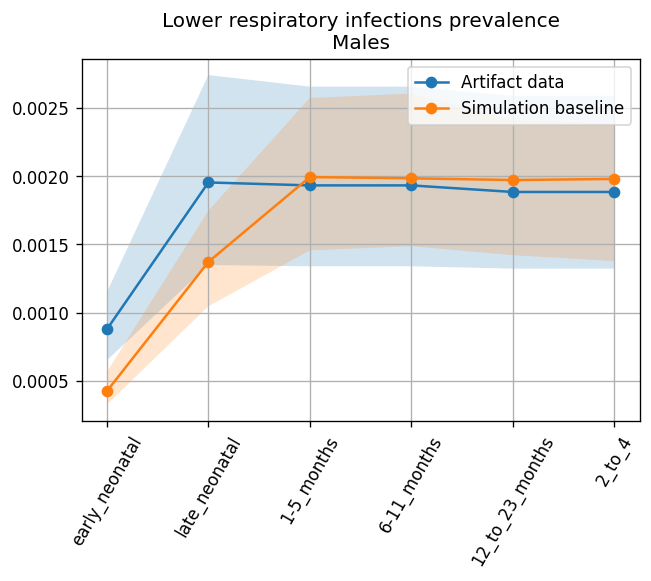

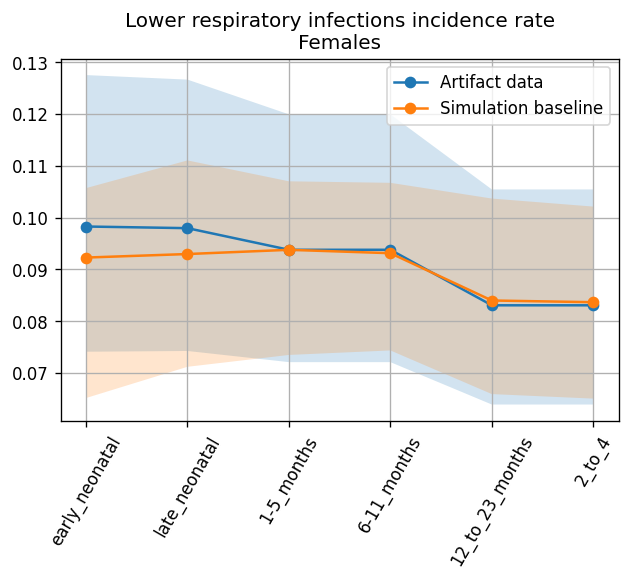

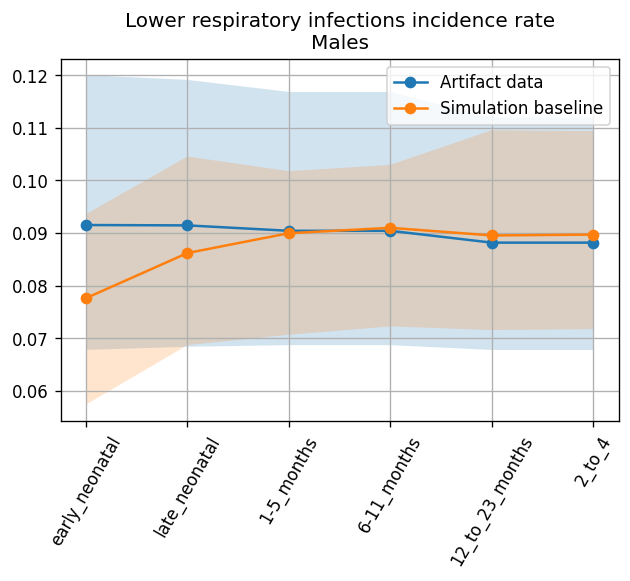

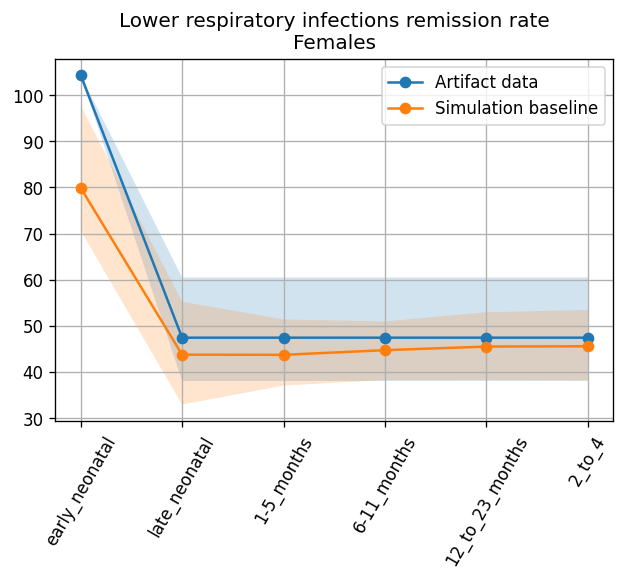

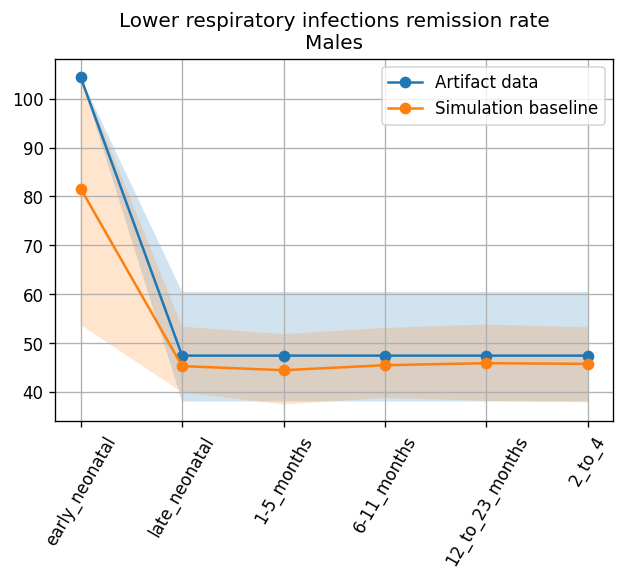

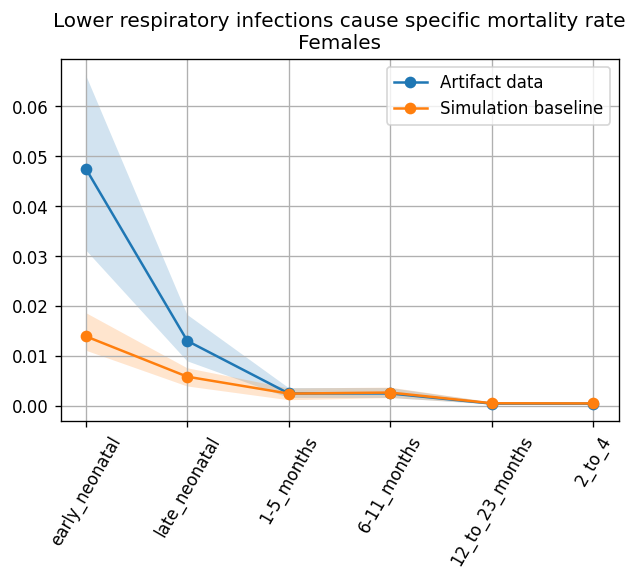

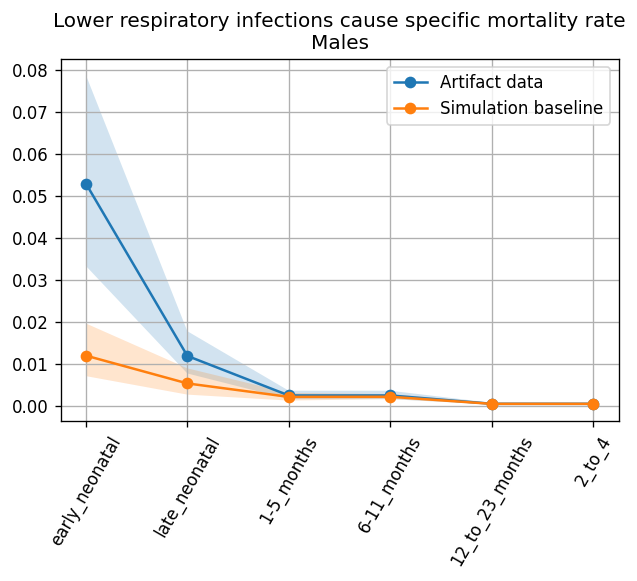

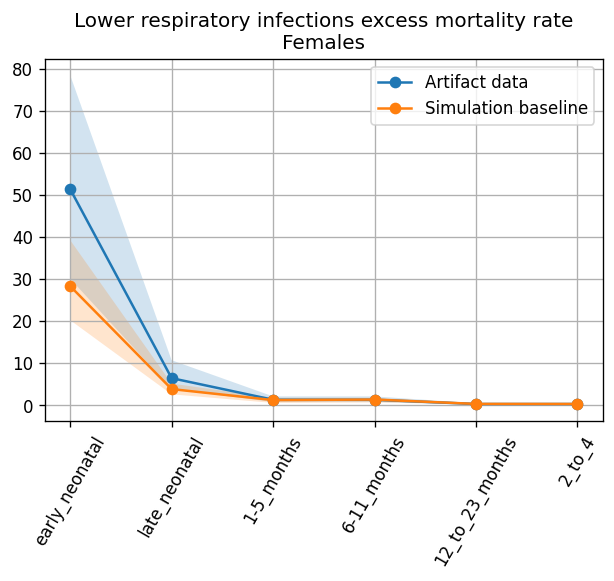

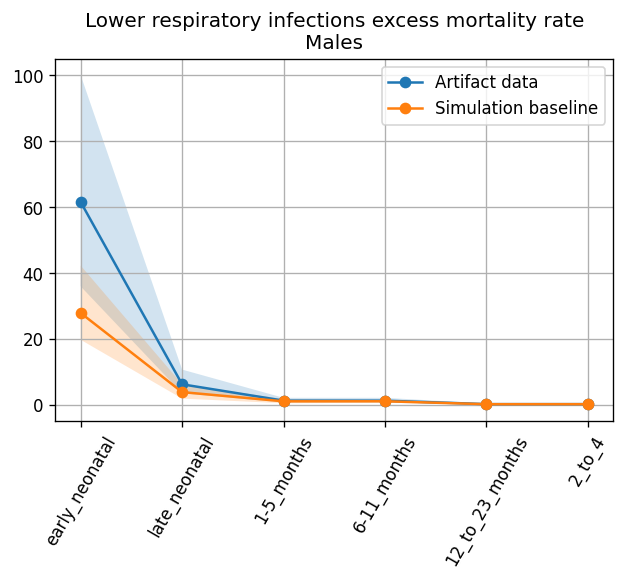

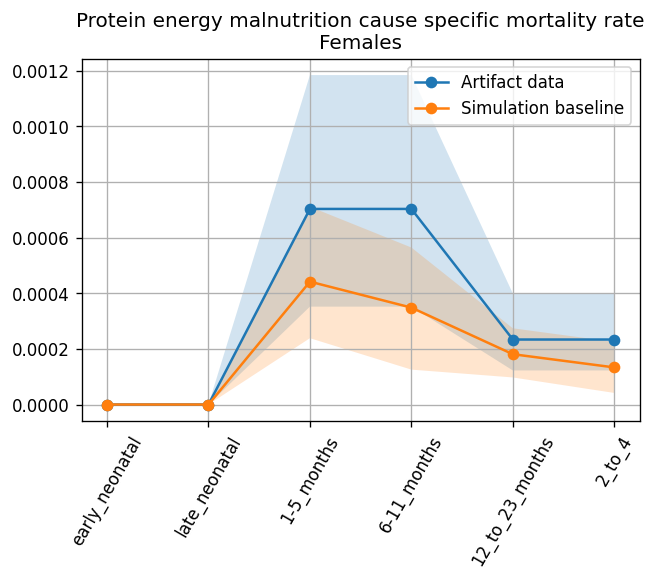

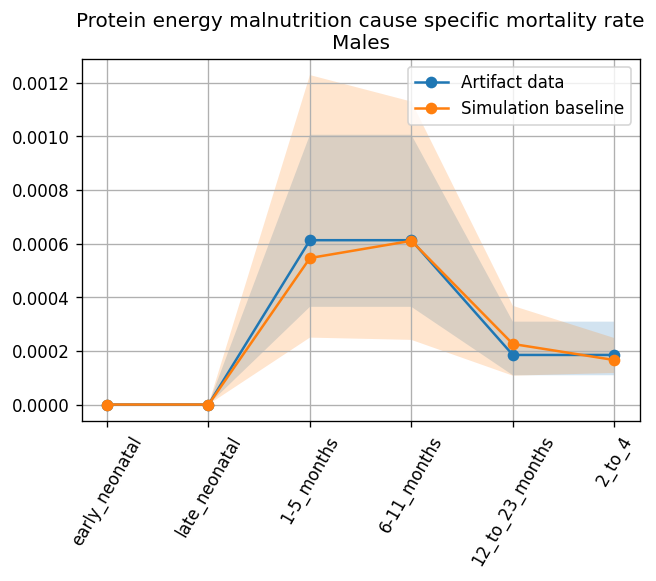

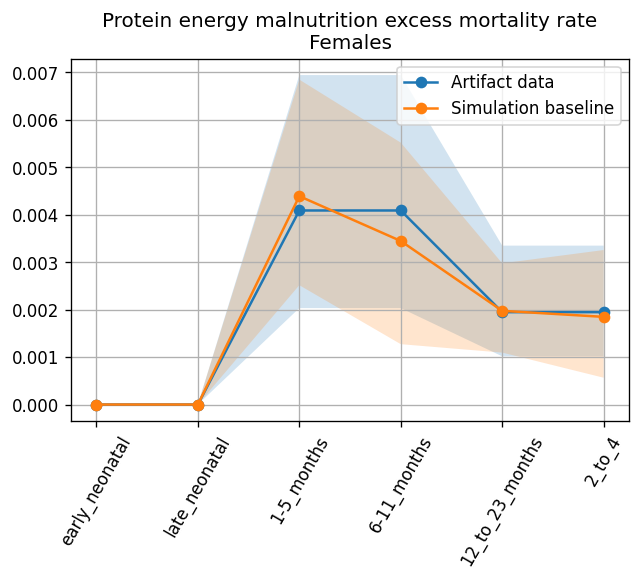

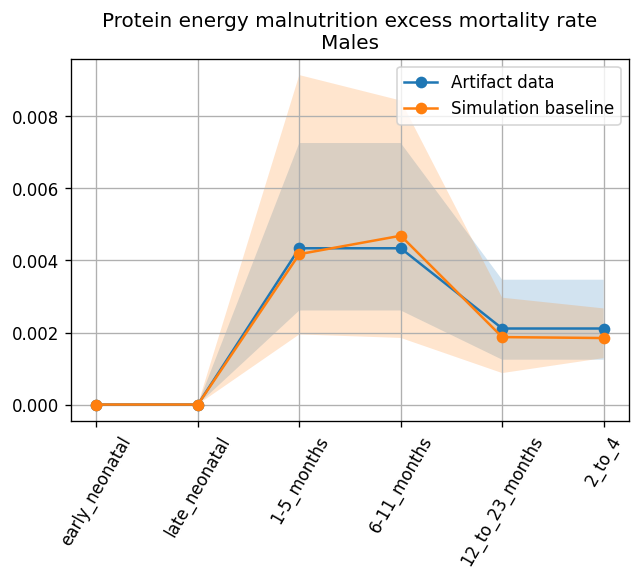

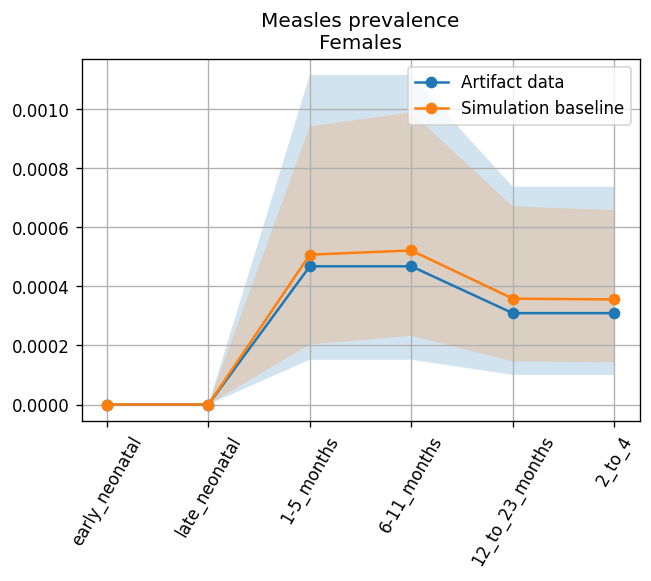

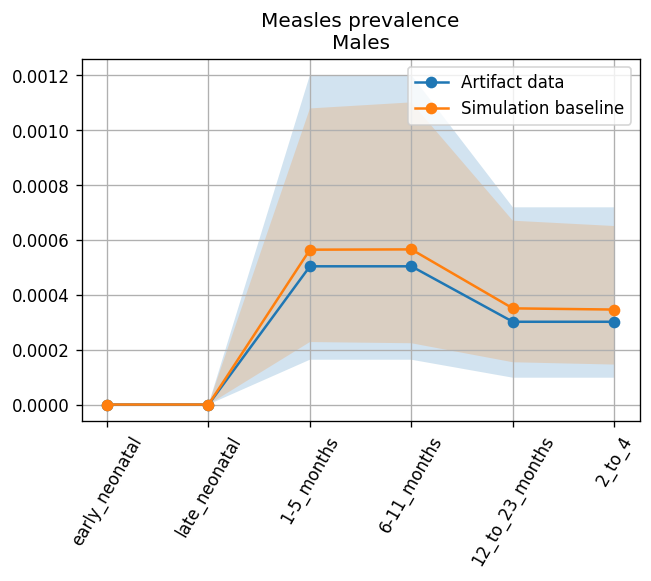

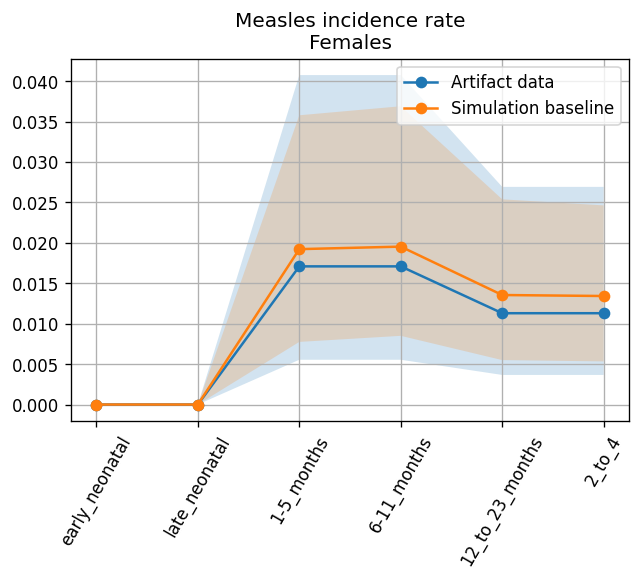

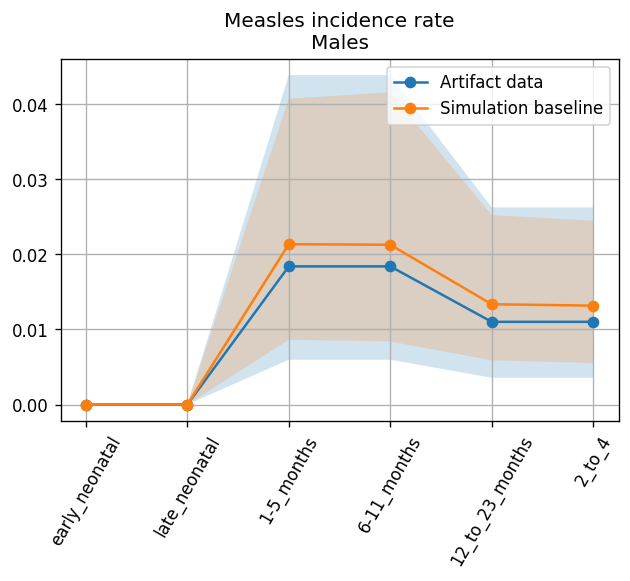

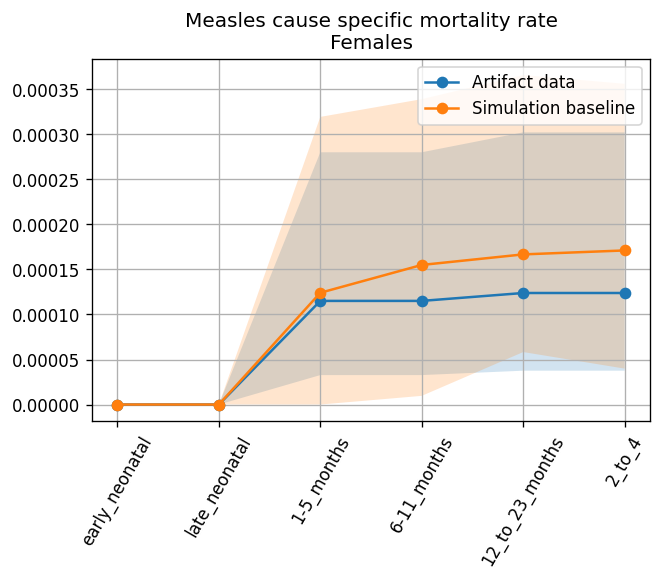

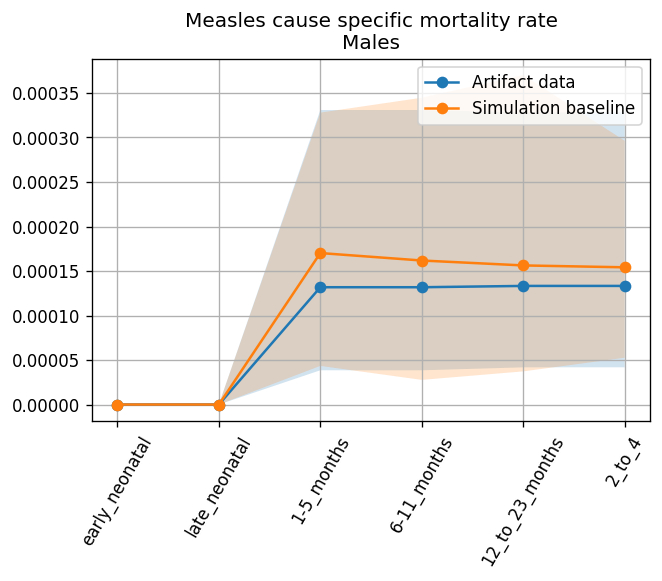

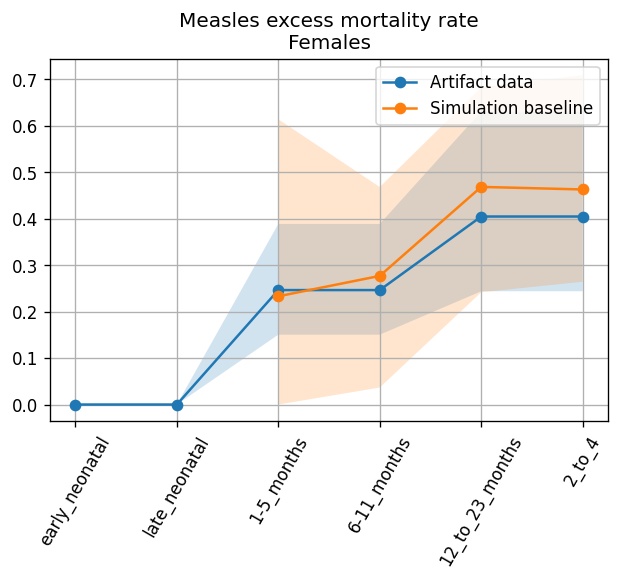

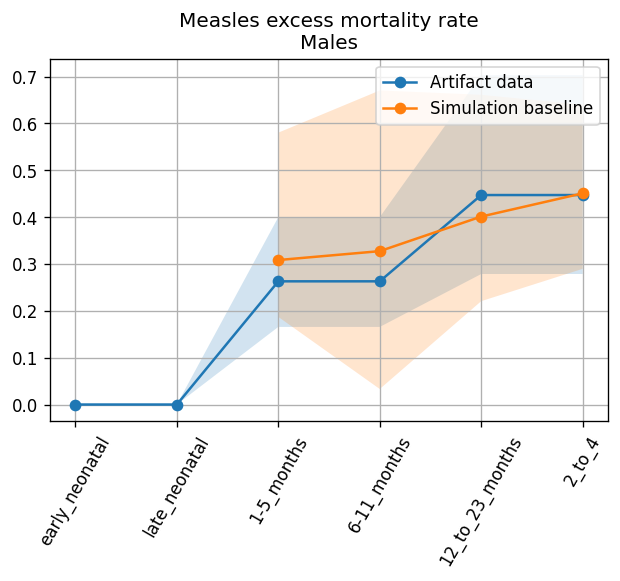

In [43]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass